### Oasis Infobyte
### Author :Shruti Shrikant Bodhe
### Task 5:To Predict How Much Products Will People Buy Based On Factors Such As Amount Spend On Advertisement
### March Phase 2 OIBSIP

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:/Users/shrut/OneDrive/Desktop/Shruti/Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data.shape

(200, 4)

In [10]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The huge amount is spend on TV advertisement which 147 dollars & The minimum amount is spend on Radio is 147 dollars

### Exploratory Data Analysis

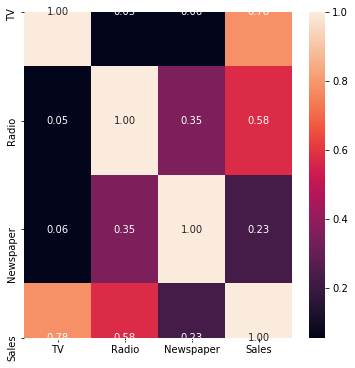

In [12]:
fig,ax=plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

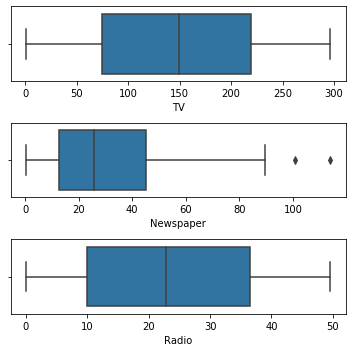

In [14]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1= sns.boxplot(data['TV'],ax=axs[0])
plt2= sns.boxplot(data['Newspaper'],ax=axs[1])
plt3= sns.boxplot(data['Radio'],ax=axs[2])
plt.tight_layout()


There is no outlier observed in dataset

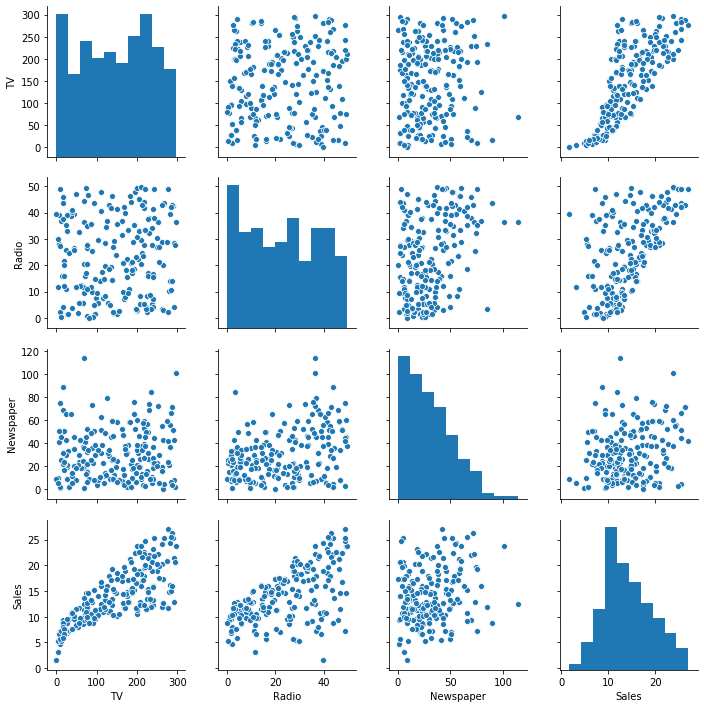

In [15]:
sns.pairplot(data)

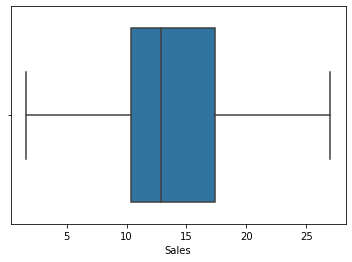

In [16]:
sns.boxplot(data['Sales'])
plt.show()

There is no outlier observed in dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002268CF07388>,
      dtype=object)

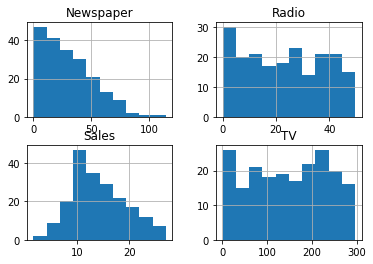

In [18]:
data.hist()

### Model Evaluation

In [21]:
features=['TV','Radio']

In [22]:
x=data[features]
y=data['Sales']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x,y)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg.score(x_train,y_train)

0.8905117540155425

In [26]:
reg.score(x_test,y_test)

0.9026717644227429

In [27]:
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8971942610828956

In [29]:
model.coef_

array([0.04575482, 0.18799423])

In [30]:
model.intercept_

2.9210999124051362

In [31]:
import statsmodels.api as sm
x_train_Sm =sm.add_constant(x_train)
x_train_Sm =sm.add_constant(x_train)

ls=sm.OLS(y_train,x_train).fit()
print(ls.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              3425.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                   2.44e-118
Time:                        14:50:39   Log-Likelihood:                         -298.86
No. Observations:                 140   AIC:                                      601.7
Df Residuals:                     138   BIC:                                      607.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\shrut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


98% Variation explained by MLR

### thank you